# Check my SCM run

* The below notebook allows to compare a single column model simulation against a set of benchmark simulations (shown in gray).
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [29]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray = 'DHARMA_Lx25_dx100_FixN_noice.' ## for DHARMA only
#sim_keyword_gray = 'Lx25_dx100_FixN_noice.'       ## for all LES

## select LES run(s) of interest
#sim_keyword_col_les = 'DHARMA_Lx25_dx100_FixN_noice.'
sim_keyword_col_scm = 'FixN_noice'


In [30]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=1026157027&format=xlsx',
                              sheet_name='SCM')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, layer'])

var_vec_2d = var_vec_2d[var_vec_2d!='zf']

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, layer'])

In [31]:
%run functions_plotting.py

## load all simulations located in subfolders of the given directory
df_gray_1d,df_gray_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray,make_gray = 1)

## example using LES
#df_col_1d_les,df_col_2d_les = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_les)

## example using SCM
df_col_1d_scm,df_col_2d_scm = load_sims('../../output_scm/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_scm,subfolder='sand')


Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
z0 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
z0h shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
z0q shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
pblh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
zi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
iwp shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
cf not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
cflc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
cfc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
pri shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN_noice.nc
ssaf shows NAN values in ../../output_les/dharma/sandbox/DHARMA_L

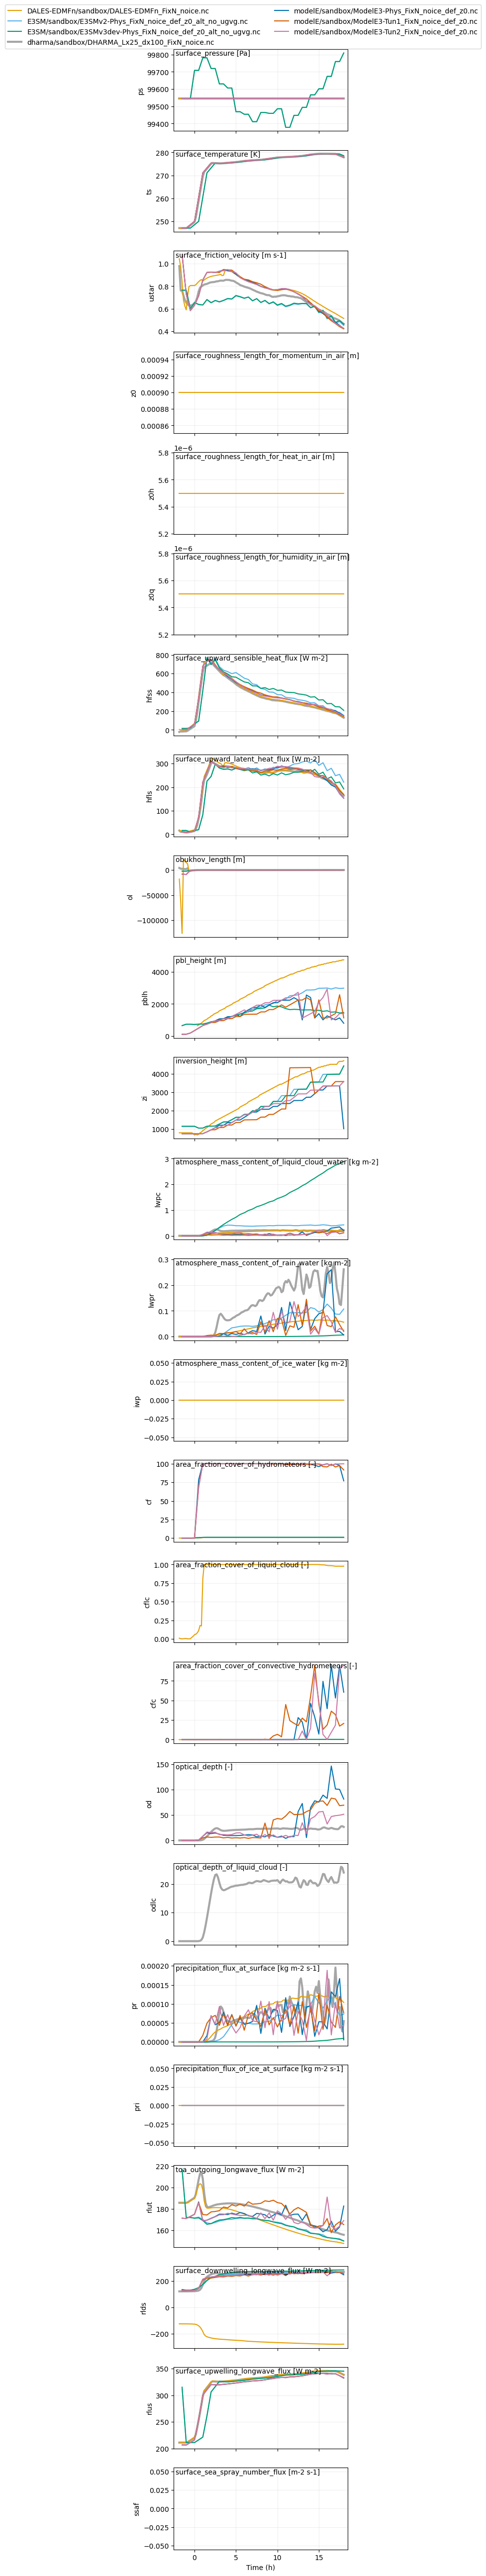

In [32]:
# plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d,df_col_1d_scm_1]),var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units)

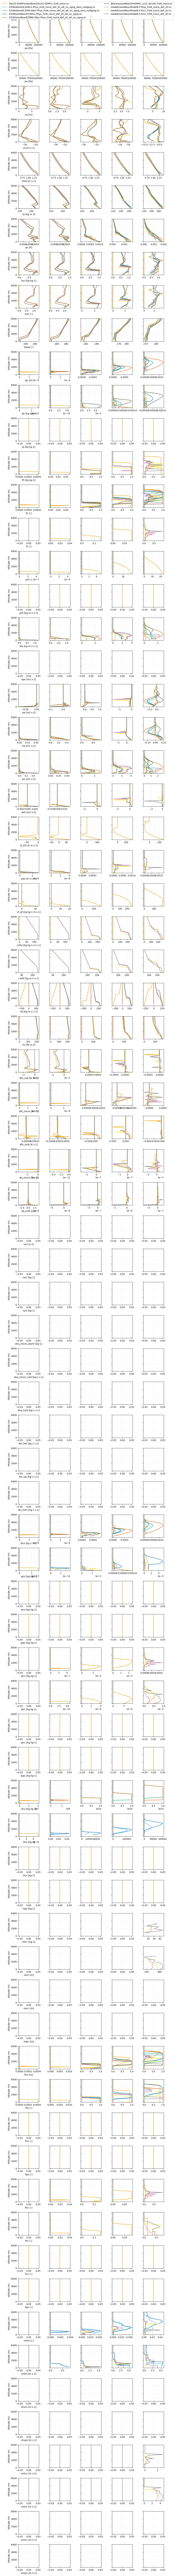

<Figure size 1000x600 with 0 Axes>

In [33]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d,df_col_2d_scm_1]),var_vec = var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units)## example where ERA5 and radiosonde are included
